# RANDOM FOREST CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\AppData\Local\Temp\ipykernel_2044\2793088780.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('LOAN_ELIGIBLE.csv')

del df['Loan_ID']
del df['Credit_History']

df.head(60)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,Semiurban,N


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y


In [6]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df['Dependents'].unique()

array([1, 0, 2, 3])

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,2,1


In [11]:
x1 = df.drop(labels='Loan_Status', axis=1)
y1 = df.loc[:,'Loan_Status']

In [12]:
# import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1: 367, 0: 156})
OVER SAMPLING DATA COUNT  :  Counter({0: 367, 1: 367})


In [13]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,1,1,1,0,0,4583,1508.0,128.0,360.0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,2
2,1,1,0,1,0,2583,2358.0,120.0,360.0,2
3,1,0,0,0,0,6000,0.0,141.0,360.0,2
4,1,1,2,0,1,5417,4196.0,267.0,360.0,2
...,...,...,...,...,...,...,...,...,...,...
729,1,1,1,0,0,2787,1917.0,146.0,360.0,0
730,1,1,2,1,0,2281,0.0,113.0,360.0,0
731,0,0,0,0,0,3180,0.0,71.0,360.0,2
732,1,1,0,1,0,7660,0.0,104.0,360.0,2


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, stratify=y, random_state=42)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  660
NUMBER OF TEST DATASET      :  74
TOTAL NUMBER OF DATASET    :  734


In [15]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET     : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  660
NUMBER OF TEST DATASET     :  74
TOTAL NUMBER OF DATASET    :  734


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [18]:
predicted = RFC.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:

               precision    recall  f1-score   support

           0       0.86      1.00      0.93        37
           1       1.00      0.84      0.91        37

    accuracy                           0.92        74
   macro avg       0.93      0.92      0.92        74
weighted avg       0.93      0.92      0.92        74



In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


 [[37  0]
 [ 6 31]]


In [21]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RFC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [80.95238095 79.59183673 89.11564626 86.39455782 85.61643836]


In [22]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS : 91.8918918918919


In [23]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS : 8.108108108108109


THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


[[37  0]
 [ 6 31]]


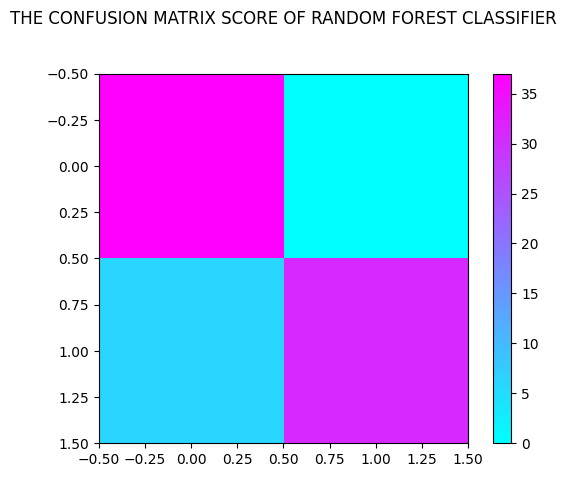

In [24]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

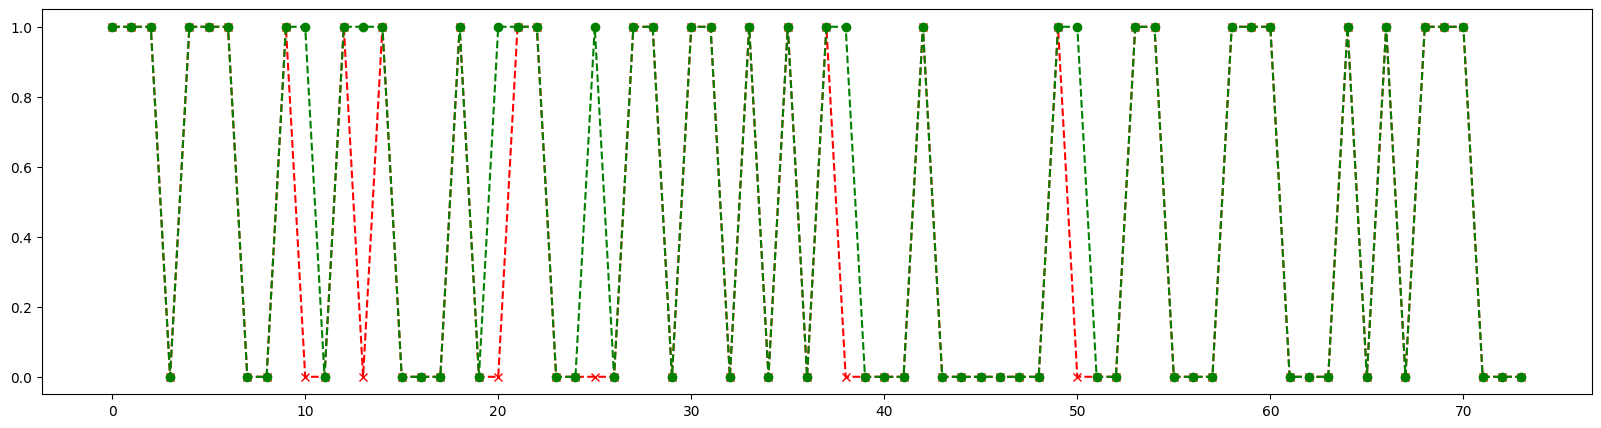

In [25]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [26]:
import joblib
joblib.dump(RFC, 'LOANfinal1.pkl')

['LOANfinal1.pkl']